1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

Poin yang perlu diperhatikan: 
mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness, dan kurtosis. 

In [61]:
import pandas as pd

pd.set_option('display.expand_frame_repr', False)

data = pd.read_csv('weather.csv')

# Hilangkan row dengan value NA
# data = data.dropna()

numerik = data.select_dtypes(include="number")
string = data.select_dtypes(include="object")

def describeNumerik(df : pd.DataFrame):
    d = pd.concat([df.describe(), df.agg(['skew', 'kurt'])])
    d.loc['var'] = df.var().tolist()
    d.loc["range"] = d.loc['max'] - d.loc['min']
    d.loc["IQR"] = d.loc['75%'] - d.loc['25%']
    d.loc["mode"] = df.mode().loc[0]
    return d

def describeString(df : pd.DataFrame):
    d = df.describe().loc[['count', 'unique']]
    return d


# Print descriptive statistics
print("Descriptive Statistics:") 
print(describeNumerik(numerik))
print("\nDescriptive Statistics String:") 
print(describeString(string)) #Tidak ada: proporsi
print("\nProporsi String: ") 
print(string.Weather_Type.value_counts(normalize=True))
print(string.Wind_Direction.value_counts(normalize=True))



Descriptive Statistics:
          Unnamed: 0  Temperature     Humidity  Precipitation   Wind_Speed  Cloud_Coverage     Pressure     UV_Index  Air_Quality   Visibility
count    2000.000000  2000.000000  2000.000000    2000.000000  2000.000000     2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean      999.500000    24.940225    70.110113       9.922872    14.929117       49.856025  1000.691301     5.464730    65.757886    15.091752
std       577.494589     3.003306     9.807775       5.031691     4.972098       10.134826    57.329860     2.588364     8.365777     4.985096
min         0.000000    15.441317    40.991391      -9.480835    -4.063694       13.241983   800.000000     1.002470    35.829769    -2.190009
25%       499.750000    22.919216    63.313635       6.695718    11.499557       43.127973   952.131330     3.316950    60.242220    11.773017
50%       999.500000    24.937000    69.871791       9.908852    14.890523       49.990347  1000.998439     5.326224  

trivial: apa itu data outlier? 

Data outlier adalah nilai yang secara signifikan berbeda dari sebagian besar data dalam kumpulan data. Outlier dapat muncul karena berbagai alasan, termasuk kesalahan pengukuran, ketidakteraturan alamiah dalam fenomena yang diamati, atau kejadian langka yang tidak umum. Keberadaan outlier dapat mempengaruhi analisis statistik dan mengarah pada kesimpulan yang salah jika tidak diidentifikasi dan ditangani dengan benar. Cara mengetahui outlier

menggunakan interquartile range (IQR). 
1. Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data. 
2. Hitung interquartile range (IQR) dengan persamaan : IQR = Q3 - Q1 
3. Tentukan batas atas dan batas bawah
    - Batas bawah: Lower Bound: Q1 - 1.5 x IQR 
    - Batas atas: Upper Bound: Q3 + 1.5 x IQR

Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.
### ANSWER: 
ya, data ini memiliki outlier jika dicari menggunakan persamaan di atas dan dikonversi menjadi python untuk mengidentifikasi data outlier pada file weather.csv 
Untuk menangani outlier bisa dilakukan 
1. Menghilangkan data terkait, tetapi hal ini dapat mengakibatkan berkurangnya sample size dari data. 
2. Menimpa (me-replace) data terkait dengan data yang lebih masuk akal seperti mean, median, atau modus. 
3. Alternatif lain bisa dilakukan perhitungan matematika pada data seperti, logaritmik, akar kuadrat, atau standardisasi.
4. Biarkan data tersebut dengan menyesuaikan metode atau model analisis untuk mengolah dan menghitungnya.


In [62]:
import pandas as pd
import numpy as np

# Ambil dataFrame dari csv
data = pd.read_csv('weather.csv')

# Hilangkan row dengan value NA
data = data.dropna()

# Hilangkan row pertama yang berupa ID
del data[data.columns[0]]

# Dalam statistik string Weather_Type, hilangkan data yang muncul sangat jarang, yaitu Foggy dan Windy (0.0005)
col = 'Weather_Type' 
batas_atas = 10
data = data[data.groupby(col)[col].transform('count').ge(batas_atas)]

numeric_data = data.select_dtypes(include=['number'])

# Align data_cleaned dan numeric_data
data, numeric_data = data.align(numeric_data, axis=1)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Cari outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)

# Ambil data selain outliers
data = data[~outliers]

# Print data bersih
print("\nData Bersih:")
print(data)



Data Bersih:
      Air_Quality  Cloud_Coverage   Humidity  Precipitation     Pressure  Temperature  UV_Index  Visibility Weather_Type Wind_Direction  Wind_Speed
0       72.925943       64.494316  71.457157       7.509076  1093.875521    26.308998  5.902521   18.509121        Rainy           West   10.923478
1       64.649823       54.383351  69.672088       4.220767   965.291716    23.032419  9.047888   19.693711        Sunny           East   14.982321
2       60.461165       66.051994  86.053687       9.199037   905.728473    20.742818  1.423866   11.382937        Sunny           East    9.396453
3       73.977161       57.928168  74.641928      13.268281   980.591057    28.553441  5.918923   11.362726        Sunny           West   25.542511
5       75.520920       49.917458  66.544864      12.316017  1068.505929    23.739505  7.034857   15.523319        Sunny          North   20.331499
...           ...             ...        ...            ...          ...          ...       ...   

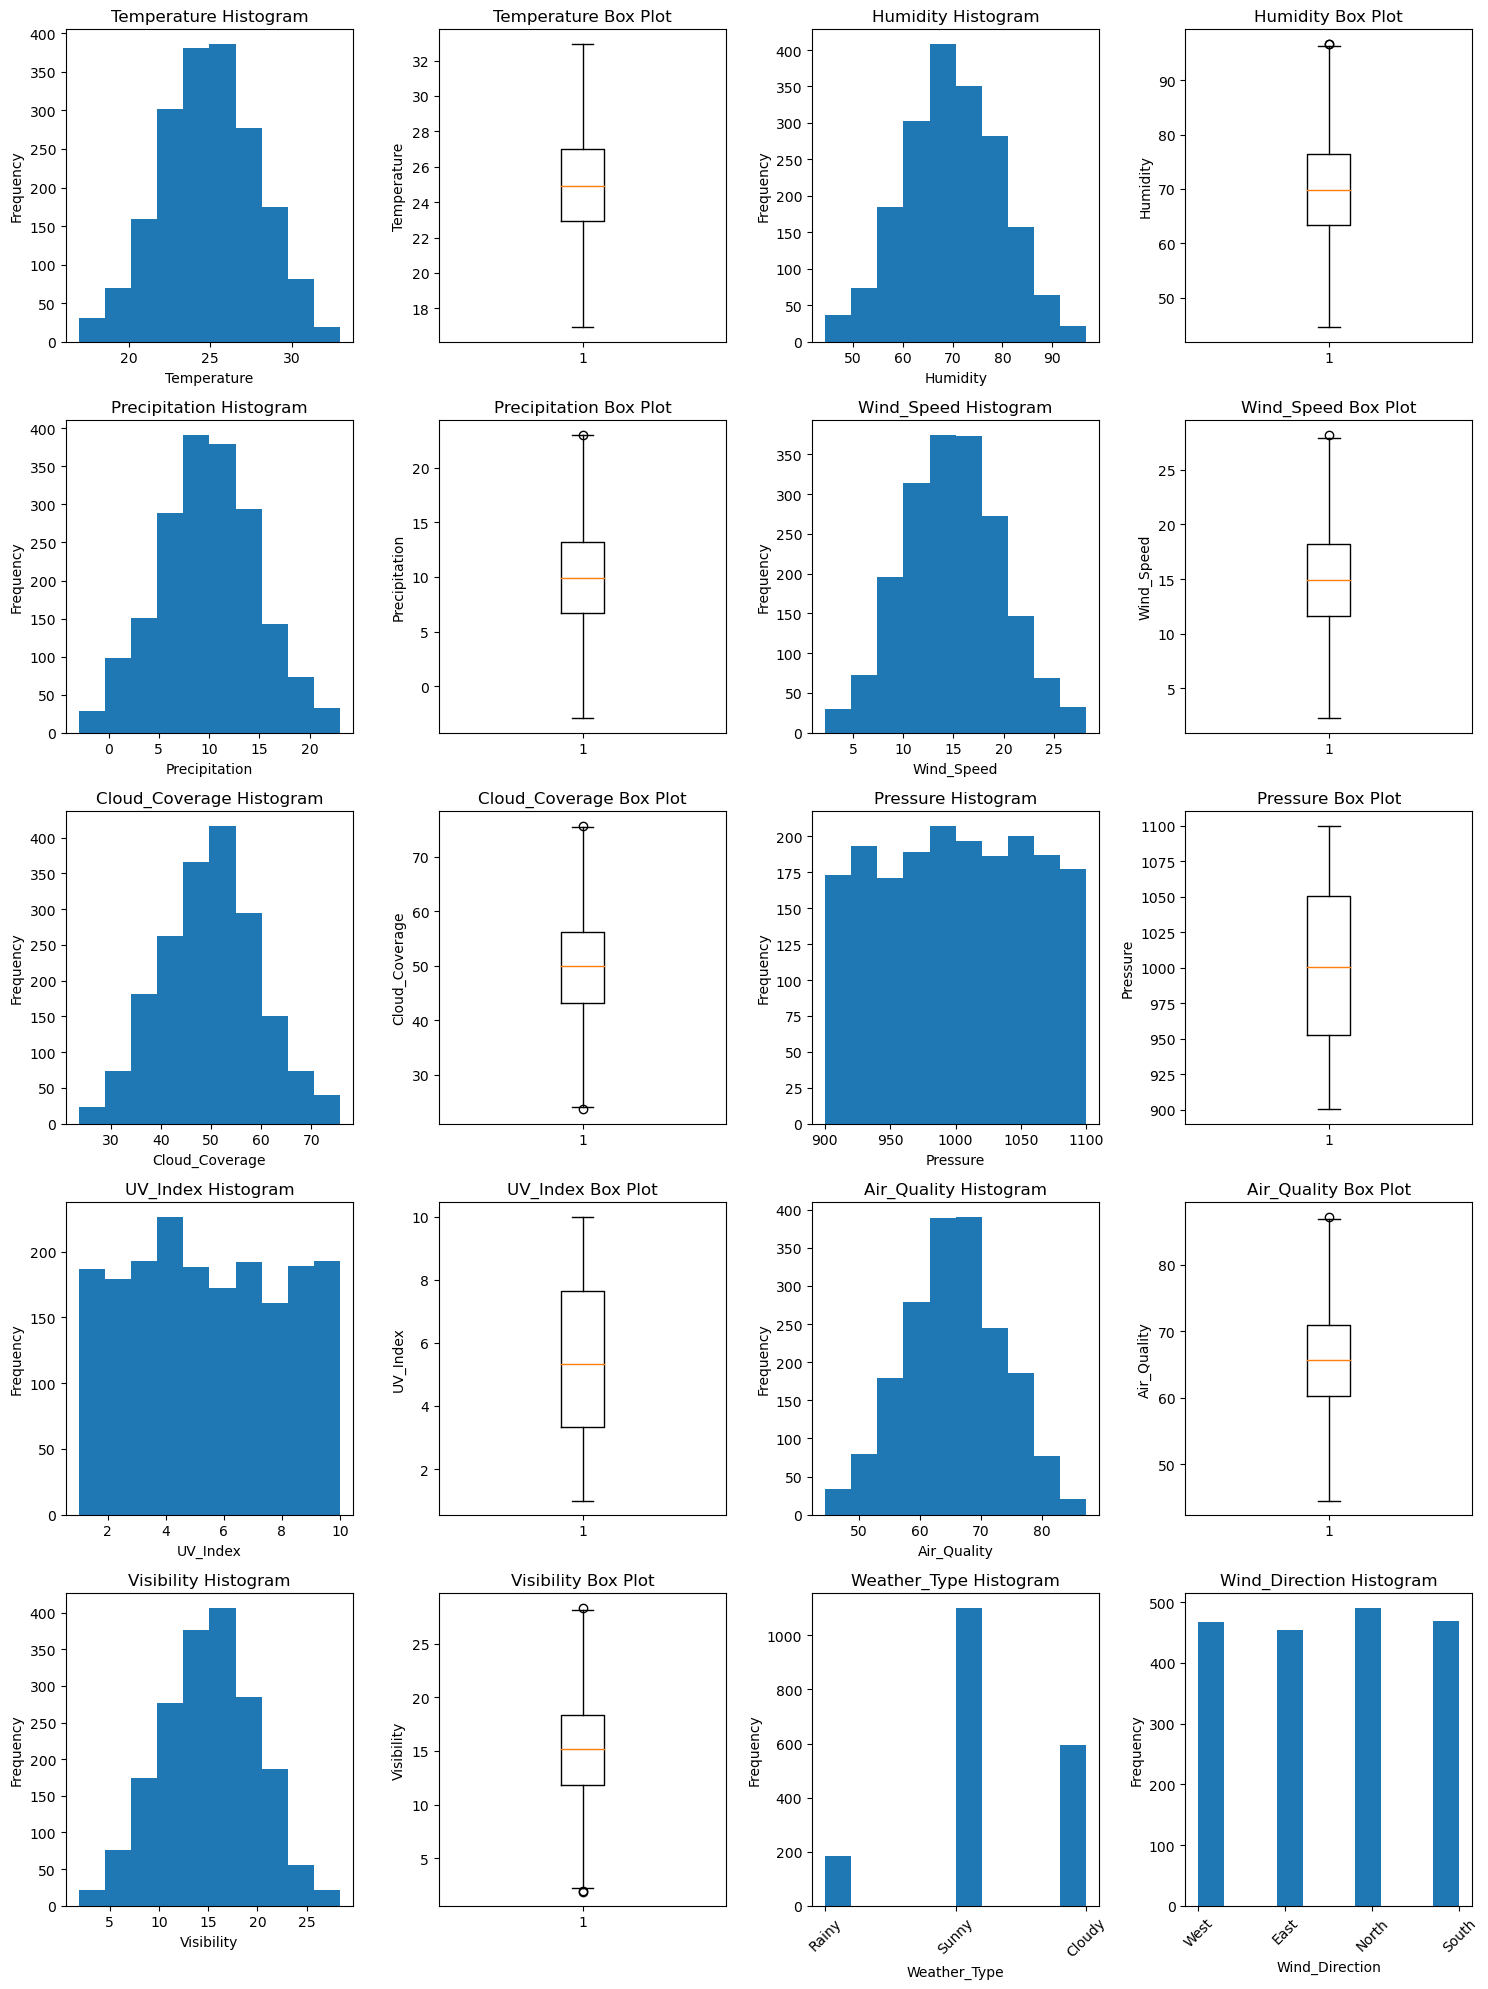

In [63]:

# ini untuk soal nomor 3 visualisasi plot distribusi (udah)
# TODO:
# Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. 
# Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Plot histograms and box plots for numerical columns
numerical_columns = ['Temperature', 'Humidity', 'Precipitation', 'Wind_Speed', 'Cloud_Coverage', 'Pressure', 'UV_Index', 'Air_Quality', 'Visibility']
string_columns = ['Weather_Type', 'Wind_Direction']

# Grid
num_plots = len(numerical_columns) * 2 + len(string_columns)
cols = 4
rows = (num_plots + cols - 1) // cols

fig = plt.figure(figsize=(15, rows * 4))
gs = gridspec.GridSpec(rows, cols, figure=fig)

plot_idx = 0

for column in numerical_columns:
    # Histogram
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.hist(data[column], bins=10)
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plot_idx += 1
    
    # Box plot
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.boxplot(data[column])
    ax.set_title(f'{column} Box Plot')
    ax.set_ylabel(column)
    plot_idx += 1

# Histogram untuk string
for column in string_columns:
    ax = fig.add_subplot(gs[plot_idx // cols, plot_idx % cols])
    ax.hist(data[column])
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(data[column].unique())))
    ax.set_xticklabels(data[column].unique(), rotation=45)
    plot_idx += 1

fig.tight_layout()
plt.show()

# Soal 4.
Dari data visual, "Apakah kolom tersebut berdistribusi normal?" Cara menentukannya lihat pola distribusi? Atau pakai rumus?

In [64]:
# Soal 4: Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. 
# Apakah kolom tersebut berdistribusi normal? 
# Jika bukan, terdistribusi seperti apa kolom tersebut?

import pandas as pd

data


,Air_Quality,Cloud_Coverage,Humidity,Precipitation,Pressure,Temperature,UV_Index,Visibility,Weather_Type,Wind_Direction,Wind_Speed
0,72.925943,64.494316,71.457157,7.509076,1093.875521,26.308998,5.902521,18.509121,Rainy,West,10.923478
1,64.649823,54.383351,69.672088,4.220767,965.291716,23.032419,9.047888,19.693711,Sunny,East,14.982321
2,60.461165,66.051994,86.053687,9.199037,905.728473,20.742818,1.423866,11.382937,Sunny,East,9.396453
3,73.977161,57.928168,74.641928,13.268281,980.591057,28.553441,5.918923,11.362726,Sunny,West,25.542511
5,75.520920,49.917458,66.544864,12.316017,1068.505929,23.739505,7.034857,15.523319,Sunny,North,20.331499
...,...,...,...,...,...,...,...,...,...,...,...
1995,59.690499,53.471833,81.743304,4.819286,951.325372,25.555042,1.708540,19.291209,Sunny,North,17.074841
1996,57.011745,37.638924,69.325419,12.841529,968.010522,22.423297,1.508120,16.427431,Sunny,East,22.575987
1997,65.469207,72.306170,64.011257,6.963011,1054.422796,28.409564,1.811080,13.703128,Sunny,West,11.311670
1998,64.672729,49.293276,71.836823,-0.637614,900.558515,23.594306,5.641948,12.382826,Cloudy,North,8.135290


### Enam Langkah Testing Hipotesis:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.). 
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0. 
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

### 5. Hipotesis 1 sampel
- Perusahaan menerima beberapa keluhan bahwa prediksi terkait nilai humidity di suatu daerah seringkali tidak tepat. Hal tersebut berakibat pada kurangnya persiapan masyarakat dalam melakukan penyesuaian kondisi termal tertentu. Dapatkah Anda mengecek apakah rata-rata nilai Humidity lebih dari 75?
- Perusahaan mengeluarkan nilai rata-rata UV_index sebesar 3. Akan tetapi, mayoritas pelanggan mengeluhkan kulitnya terasa terbakar. Sebagai karyawan yang baik, periksalah apakah rata-rata UV_Index yang diamati memang tidak sama dengan 3 (sesuai laporan pelanggan)?

- Pemerintah setempat menyarankan agar penduduk menghindari aktivitas di luar ruangan di 5 hari terakhir (asumsi: data terbaru berada pada urutan paling awal) karena nilai rata-rata pressure diprediksi berada di angka 950. Periksa apakah nilai rata-rata pressure ?

- Apakah proporsi nilai Cloud_Coverage yang kurang dari 60 tidak sama dengan 35% dari total dataset, sesuai dengan himbauan yang diberikan oleh pemerintah setempat?

### Jawab (WIP)
a) Apakah rata2 humidity lebih dari 75?
- H0: u = 75
- H1: u > 75

b) Apakah rata2 UV_INDEX tidak sama dengan 3?
- H0: u = 3
- H1: u != 3

c) Periksa apakah nilai rata-rata pressure berada di angka 950?
- H0: u = 950
- H1: u < 950

d) Apakah proporsi nilai Cloud_Coverage yang kurang dari 60 tidak sama dengan 35% dari total dataset? 
Dalam bahasa probstat, "proporsi kurang dari 60 != 35%" itu apa?
- H0:
- H1: 

In [65]:
# Soal 5: Hipotesis 1 Sampel

# data.

### 6. Hipotesis 2 sampel
Perusahaan ingin membandingkan kondisi cuaca di dua area geografis yang berbeda. Hal ini dapat dilakukan dengan membagi 1 dataset menjadi 2 bagian yang sama panjang. 

- Dapatkah Anda memeriksa apakah rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B?

- Bandingkan rata-rata Wind Speed antara Area A dan Area B. Apakah rata-rata Wind Speed di Area A lebih tinggi daripada di Area B sebesar 5 mm?

- Perusahaan ingin membandingkan kualitas udara (Air_Quality) antara Area A dan Area B. Dapatkah Anda memeriksa apakah variansi Air_Quality di Area A sama dengan di Area B?

- Periksa apakah proporsi nilai precipitation yang kurang dari 7 pada daerah A lebih besar daripada kuantitas proporsi di daerah B dengan nilai yang sama?

### Jawab (WIP)
Bagi dataset jadi 2 bagian sama panjang? Kondisi cuaca di dua area geografis yang berbeda?


In [66]:
# Soal 6: Hipotesis 2 Sampel